<a href="https://colab.research.google.com/github/Helm110/ASTRON-1221/blob/main/transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as ac

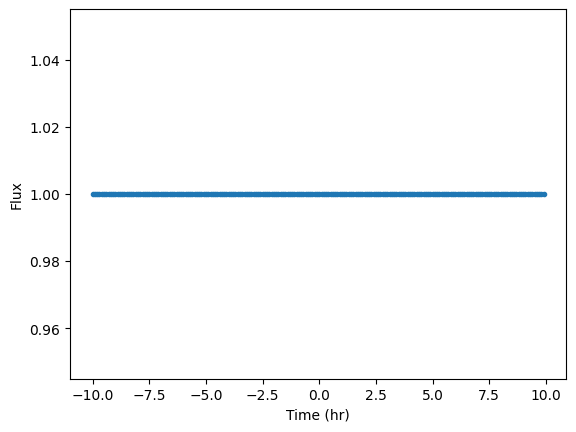

In [ ]:
time_arr = np.arange(-10,10,0.1) * u.hour
flux_arr = np.zeros(np.shape(time_arr)) + 1.0
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")
plt.xlabel("Time (hr)")
plt.ylabel("Flux")
plt.show()

In [ ]:
tau = 2.0*u.hour
t0 = 1.0*u.hour
time_start = t0 - tau / 2
time_end = t0 + tau / 2
print(time_start, time_end)

0.0 h 2.0 h


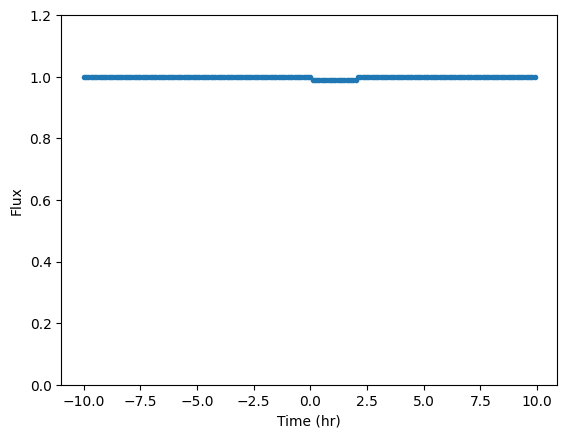

In [ ]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
delta = .01
flux_arr[ind] = 1 - delta
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")
plt.xlabel("Time (hr)")
plt.ylabel("Flux")
plt.ylim(0,1.2)
plt.show()

In [ ]:
def generate_transit_lightcurve(time_arr, t0, tau, delta):
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t0 - tau / 2
  time_end = t0 + tau / 2
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1 - delta
  return flux_arr

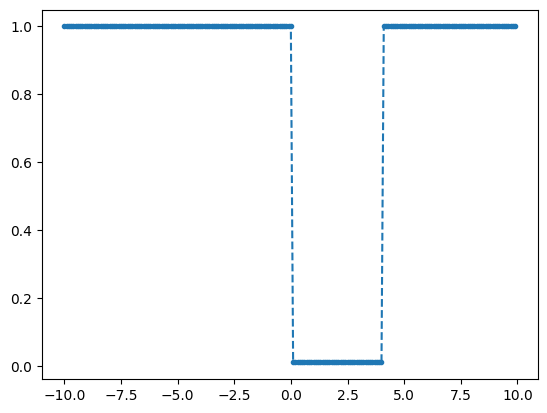

In [ ]:
time_arr = np.arange(-10,10,0.1) * u.hour
tau = 4.0 * u.hour
t0 = 2.0 * u.hour
delta = .99
flux_arr = generate_transit_lightcurve(time_arr, t0, tau, delta)
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gj436b.tbl to gj436b.tbl


In [ ]:
import astropy.io.ascii
dat = astropy.io.ascii.read("gj436b.tbl")

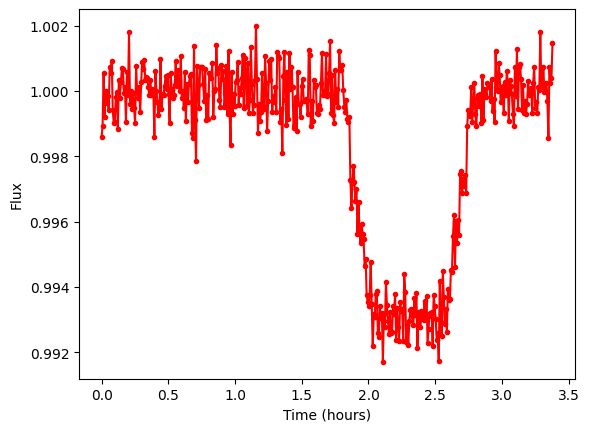

In [ ]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker= ".", color = "red")
plt.xlabel("Time (hours)")
plt.ylabel("Flux")
plt.show()


In [ ]:
t0 = 2.3 * u.hour
tau = .9 * u.hour
delta = .007
flux_model = generate_transit_lightcurve(time_obs, t0, tau, delta)


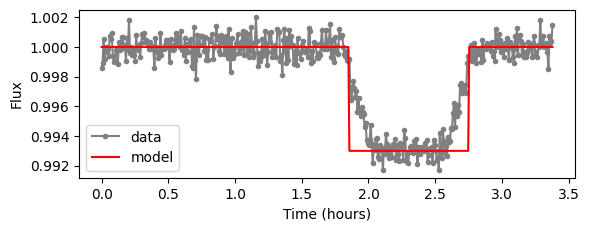

In [ ]:
plt.subplot(2, 1, 1)
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker= ".", color = "gray", label="data")
plt.plot(time_obs, flux_model, linestyle = "-", color = "red", label="model")
plt.xlabel("Time (hours)")
plt.ylabel("Flux")
plt.legend()
plt.show()


In [ ]:
#Chi Value of Parameter set 1
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

Deg_Freedom = len(time_obs) - 3
reduced_chi1 = np.sum(((flux_obs - flux_model)/error)**2) / Deg_Freedom
print(reduced_chi1)

2.878233593260228


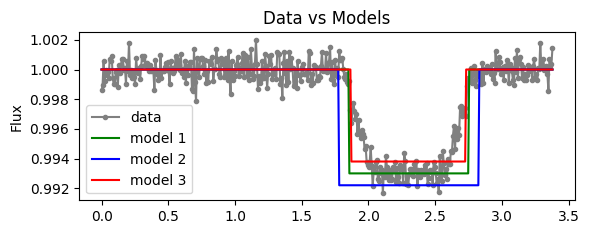

In [ ]:
#Creating additional approximates
t02 = 2.3 * u.hour
tau2 = 1.05 * u.hour
delta2 = .0078
flux_model2 = generate_transit_lightcurve(time_obs, t02, tau2, delta2)

t03 = 2.3 * u.hour
tau3 = .86 * u.hour
delta3 = .0062
flux_model3 = generate_transit_lightcurve(time_obs, t03, tau3, delta3)



plt.subplot(2, 1, 1)
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker= ".", color = "gray", label="data")
plt.plot(time_obs, flux_model, linestyle = "-", color = "green", label="model 1")
plt.plot(time_obs, flux_model2, linestyle = "-", color = "blue", label="model 2")
plt.plot(time_obs, flux_model3, linestyle = "-", color = "red", label="model 3")
plt.ylabel("Flux")
plt.title("Data vs Models")
plt.legend()
plt.show()


In [ ]:
#Chi Value of Parameter set 1
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

Deg_Freedom = len(time_obs) - 3
reduced_chi1 = np.sum(((flux_obs - flux_model)/error)**2) / Deg_Freedom
print(reduced_chi1)

#Chi Value of Parameter set 2 (Over estimate)
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

Deg_Freedom = len(time_obs) - 3
reduced_chi2 = np.sum(((flux_obs - flux_model2)/error)**2) / Deg_Freedom
print(reduced_chi2)

#Chi Value of Parameter set 3 (Over estimate)
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind])

Deg_Freedom = len(time_obs) - 3
reduced_chi3 = np.sum(((flux_obs - flux_model3)/error)**2) / Deg_Freedom
print(reduced_chi3)

2.878233593260228
9.16234929667041
1.8922124267393983


In [ ]:
#Testing Automatic model maker

t0_range = np.arange(2.2, 2.40, 0.01) * u.hour  # Range of t0 values
tau_range = np.arange(0.75, 1.10, 0.001) * u.hour  # Range of tau values
delta_range = np.arange(0.005, 0.010, 0.0005)  # Range of delta values

best_chi2 = np.inf  # Initialize with a very large value
best_params = {2.29, .8, .006499}  # Dictionary to store best parameters

best_chi2_diff = np.inf  # Initialize with a very large value
best_params = {}  # Dictionary to store best parameters

for t0 in t0_range:
    for tau in tau_range:
        for delta in delta_range:
            flux_model = generate_transit_lightcurve(time_obs, t0, tau, delta)

            # Calculate chi-squared
            ind = np.where(time_obs < 1.5 * u.hour)
            error = np.std(flux_obs[ind])
            chi2 = np.sum(((flux_obs - flux_model) / error)**2)

            #Calculate Reduced chi-squared
            Deg_Freedom = len(time_obs) - 3
            reduced_chi2 = chi2 / Deg_Freedom

            # Update best parameters if reduced chi-squared is closer to 1
            chi2_diff = abs(reduced_chi2 - 1)  # Difference from 1
            if chi2_diff < best_chi2_diff:
                best_chi2_diff = chi2_diff
                best_params = {'t0': t0, 'tau': tau, 'delta': delta}

print("Best-fit parameters:", best_params)
print("Best reduced chi-squared:", reduced_chi2)

NameError: name 'np' is not defined